In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prince import FAMD
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
X_ini=pd.read_excel('DB_J(RRN,RTE500).xlsx') 
X_ini=X_ini.iloc[680:1689,:]
X_ini=X_ini.reset_index()
X_ini=X_ini.drop(['index'],axis=1)
X=X_ini.drop(['T2007','T2008','T2009','T2010','T2011','T2012','T2013','T2014','T2015'], axis=1) 
X=X.fillna('-999')
famd = FAMD(n_components =11, n_iter = 3, random_state = 101)
famd.fit(X)
famd.transform(X)
X=famd.transform(X)

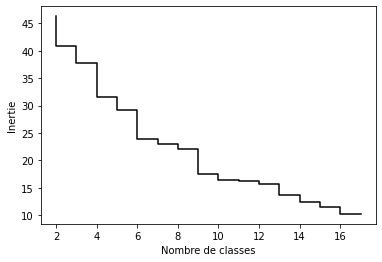

In [3]:
############################ Application de la CAH ############################
#générer la matrice des liens :
Z = linkage(X,method= 'ward', metric= 'euclidean')

# diagramme d'inertie (Scree plot) pour définir le nombre optimal de catégories/classes :    
last = Z[-16:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)
plt.step(idxs, last_rev, c="black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")
plt.show()

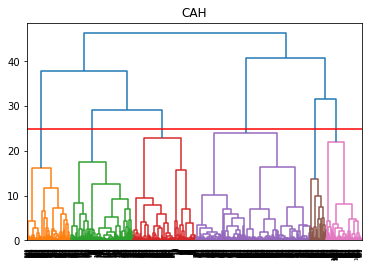

6 groupes constitués


In [4]:
n=25
#n=14

#affichage du dendrogramme :
plt.title("CAH")
dendrogram(Z,labels= X.index, color_threshold =n)
plt.axhline(y = n, color = 'r', linestyle = '-') 
plt.show()

#découpage à la hauteur t = 20 ==> identifiants de 9 groupes obtenus
groupes_cah=fcluster(Z,t=n, criterion ='distance') 
print(np.unique(groupes_cah).size, "groupes constitués")

#index triés des groupes :
idg = np.argsort(groupes_cah)

#affichage des observations et leurs groupes
cluster_cah=pd.DataFrame(X.index[idg], groupes_cah[idg])

In [5]:
# ACP :
from sklearn.decomposition import PCA

#pca = PCA(n_components=min(X_KM.shape[0], X_KM.shape[1]))#10)
pca = PCA(n_components=None)
X_pca=pca.fit_transform(X)   # Matrice obtenue après application de l'ACP
print(pca.explained_variance_ratio_.cumsum())

expl_var=pca.explained_variance_ratio_
print(expl_var)

X_pca=pd.DataFrame(X_pca)

[0.20620886 0.39847871 0.52913306 0.62006797 0.69311363 0.75705311
 0.81360179 0.86440198 0.91226631 0.95685807 1.        ]
[0.20620886 0.19226986 0.13065435 0.09093491 0.07304566 0.06393949
 0.05654867 0.0508002  0.04786433 0.04459176 0.04314193]


[0.20620886 0.39847871 0.52913306 0.62006797 0.69311363 0.75705311
 0.81360179 0.86440198 0.91226631]


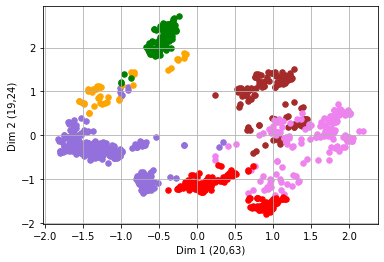

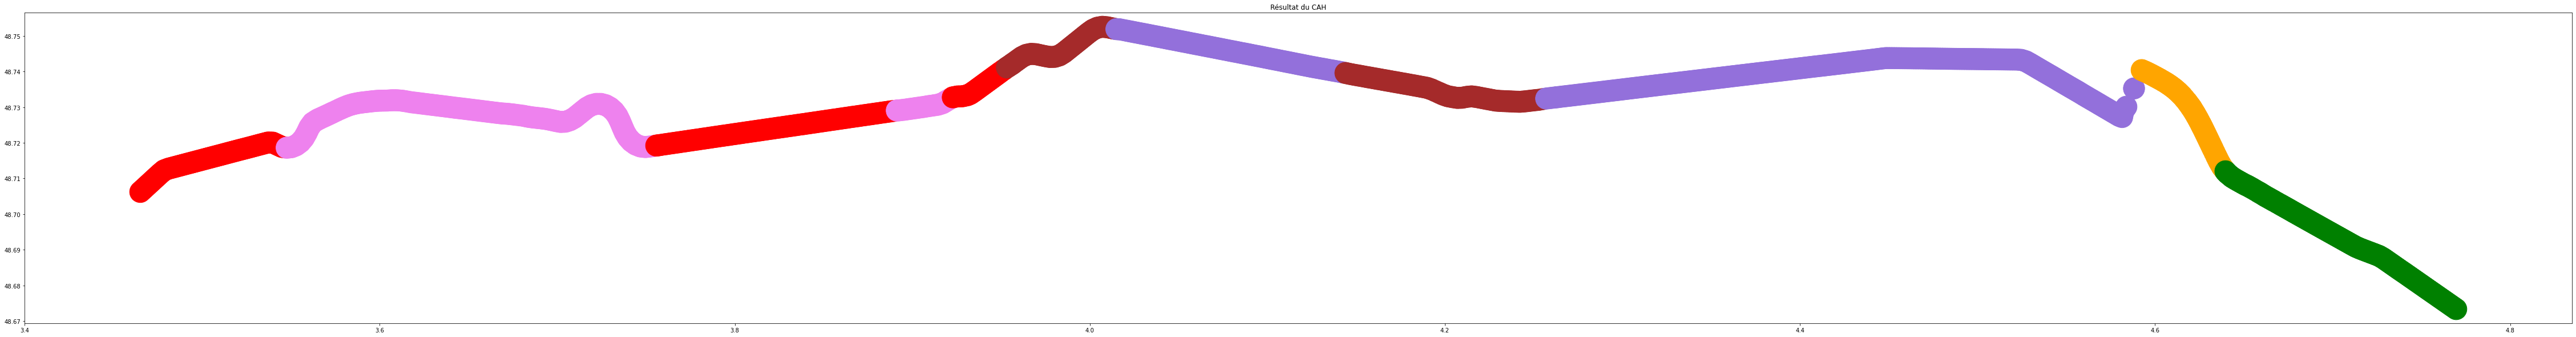

In [6]:
#################### Afficahage de la carte des individus #####################
n_CP = 9   # Nombre de composantes principales
pca = PCA(n_components=n_CP)
pcs = pca.fit_transform(X)
print(pca.explained_variance_ratio_.cumsum())
pc1_values = pcs[:,0]
pc2_values = pcs[:,1]

# color_list=["red", "green", "blue", "yellow", "pink", "orange", "aqua", "magenta", "brown", "black"]
color_list=["black", "brown", "violet", "red", "mediumpurple", "orange", "green", "grey", "yellow", "aqua"]
for couleur,k in zip(color_list[0:max(groupes_cah)+1], range(0,max(groupes_cah)+1)):
    plt.scatter(pcs[groupes_cah==k,0], pcs[groupes_cah==k,1], c=couleur, s=30)
plt.xlabel("Dim 1 (20,63)")
plt.ylabel("Dim 2 (19,24)")
plt.grid(True)
plt.show()

#Visualisation (Segmentation de la route) :
colormap=np.array(["black", "brown", "violet", "red", "mediumpurple", "orange", "green", "grey", "yellow", "aqua"])
plt.figure(figsize=(80,10))
plt.title("Résultat du CAH")
plt.scatter(X_ini.longitudeD, X_ini.latitudeD, c=colormap[groupes_cah], s=1400)
plt.show()

In [7]:
X_copy=X_ini.copy()
X_copy=X_copy.drop(['longueur','concessionPrD','absD','cumulD','xD','yD','zD','prF','depPrF',
                    'absF','cumulF','latitudeF','xF','yF','zF',
                    'NumVoie','Classe-Etat_lib','Dept','Hierrarchie'], axis=1)
L=pd.DataFrame(columns=X_copy.columns)
for i in X.index[idg]:
    j=i
    L=pd.concat([L,X_copy.iloc[i:j+1,:]], ignore_index=True)
#print(L)   
L['Clusters']=groupes_cah[idg]
L['index[idg]']=X_ini.index[idg]
CAH_Clusters=L

In [8]:
################### Analyse des résultats obtenues par CAH ################
Clusters_counts=CAH_Clusters['Clusters'].value_counts()
print(Clusters_counts)
#KM_Clusters['Clusters'].value_counts().plot.bar()
Data_analy=CAH_Clusters.groupby(['Clusters']).mean()
Data_sum=CAH_Clusters.groupby(['Clusters']).sum()
Data_count=CAH_Clusters.groupby('Clusters').count()
print(Data_analy)
M=(CAH_Clusters['Clusters'].value_counts()/CAH_Clusters['Clusters'].count())*100
print(M)
#CAH_Clusters.to_excel(r'C:/Users/taha/Desktop/Bases de Données (RRN, RTE500)/scripts python\6clusters_CAH.xlsx', index = False)

# Bitumen :  
for i in range(0,max(CAH_Clusters['Clusters'])+1):
    D=CAH_Clusters[CAH_Clusters['Clusters']==i]
    b=(D['Bitumen'].value_counts()/D['Bitumen'].count())*100
    print(i,end = "\n")
    print(b)
    
# Nature de la chaussée :
for i in range(0,max(CAH_Clusters['Clusters'])+1):
    D=CAH_Clusters[CAH_Clusters['Clusters']==i]
    p=(D['profil'].value_counts()/D['profil'].count())*100
    print(i,end = "\n")
    print(p)
    
# Etat de la chaussée :
for i in range(0,max(CAH_Clusters['Clusters'])+1):
    D=CAH_Clusters[CAH_Clusters['Clusters']==i]
    c=(D['Classe-Etat'].value_counts()/D['Classe-Etat'].count())*100
    print(i,end = "\n")
    print(c)

# Vocation :
for i in range(0,max(CAH_Clusters['Clusters'])+1):
    D=CAH_Clusters[CAH_Clusters['Clusters']==i]
    c=(D['vocation'].value_counts()/D['vocation'].count())*100
    print(i,end = "\n")
    print(c) 
    
# Type Carrefour :
for i in range(0,max(CAH_Clusters['Clusters'])+1):
    D=CAH_Clusters[CAH_Clusters['Clusters']==i]
    c=(D['typecarrefour_lib'].value_counts()/D['typecarrefour_lib'].count())*100
    print(i,end = "\n")
    print(c)        

4    346
2    188
3    188
1    132
6    107
5     48
Name: Clusters, dtype: int64
          longitudeD  latitudeD  longitudeF  nBVoiesDroite  nBVoiesGauche  \
Clusters                                                                    
1           4.117323  48.739249    4.118647       2.000000       2.000000   
2           3.684043  48.727968    3.685318       1.872340       1.829787   
3           3.728591  48.722545    3.729913       1.000000       1.010638   
4           4.328349  48.740631    4.329691       1.028902       1.023121   
5           4.618433  48.728602    4.619416       1.375000       1.250000   
6           4.704225  48.693277    4.705451       1.981308       1.962617   

                  TMJA    ratio_PL  typecarrefour     Width     Lenght  ...  \
Clusters                                                                ...   
1          8621.030303  419.489362      44.272727  8.087879  72.638939  ...   
2         11300.000000  327.000000      22.287234  8.623404  67

[0.20620886 0.19226986 0.13065435 0.09093491 0.07304566 0.06393949
 0.05654867 0.0508002  0.04786433]


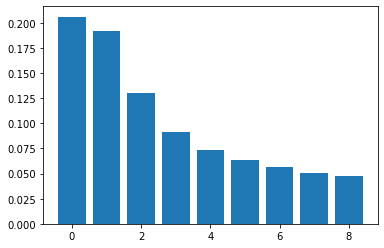

In [9]:
ratio=pca.explained_variance_ratio_
print(ratio)

y_pos = np.arange(len(ratio))
# Create bars
plt.bar(y_pos, ratio)
plt.show()